In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import cv2
from utils import *
from tensorflow.keras.models import model_from_json, load_model
from mtcnn.mtcnn import MTCNN
from pathlib import Path as path
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [2]:
tf.enable_eager_execution()

In [3]:
img_lst = pd.read_csv("test/test_list.csv")
img_lst.info()
img_lst = img_lst.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169396 entries, 0 to 169395
Data columns (total 1 columns):
paths    169396 non-null object
dtypes: object(1)
memory usage: 1.3+ MB


In [4]:
img_lst.shape

(169396, 1)

In [5]:
path = "test/"

In [6]:
img = plt.imread(path+img_lst[0][0])

In [7]:
img.shape

(227, 199, 3)

In [8]:
bb = detect_faces(img)

W0705 13:21:43.547422  3648 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0705 13:21:43.559390  3648 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0705 13:21:43.582364  3648 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0705 13:21:43.582364  3648 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 13:21:43.584323  3648 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\layer_factory.py:79: The name tf.get_variable is depr

In [12]:
bb

[[58, 63, 80, 107]]

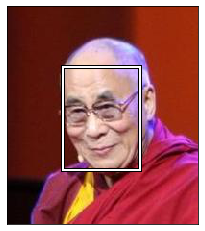

In [13]:
a = show_img(img)
draw_bb(a, bb[0])

In [18]:
model = load_model("Models/FaceNet/facenet_keras.h5")
features= extract_feature(model, img, bb[0])

W0705 13:54:34.131642  3648 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0705 13:54:34.134635  3648 deprecation_wrapper.py:119] From C:\Users\user\workspace\Face_recognition\utils.py:34: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



NameError: name 'tmp' is not defined

In [17]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________